In [3]:
from featurization.topology_selector import MDTopologySelector

# Topology file path
topology_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"

# Instantiate the topology selector
topsel = MDTopologySelector(topology_file)

# Get all bonded pairs of CA atoms
bonded_pairs = topsel.get_atom_pairs("name CA", bonded=False)
print("Total Number of distances in topology: ", topsel.n_distances)

# Get all triplets indices for atom angles
bonded_triplets = topsel.get_triplets("backbone", bonded=True)
print("Total Number of angles in topology: ", topsel.n_angles)

# Get all quadruplets indices for atom dihedrals
bonded_quads = topsel.get_quads("backbone", bonded=True)
print("Total Number of dihedrals in topology: ", topsel.n_dihedrals)

# Get atom indices
atom_indices = topsel.get_atom_indices("name CA")
print("Total Number of atoms in topology: ", topsel.n_atoms)


Total Number of distances in topology:  35778
Total Number of angles in topology:  0
Total Number of dihedrals in topology:  0
Total Number of atoms in topology:  268


In [4]:
from featurization.featurizer import Featurizer

# Load the trajectory
trajectory_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.dcd"
topology_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"

# Featurization
featurizer = Featurizer(trajectory_file, topology_file)

feature_dict = {
    'cartesian': {"indices": atom_indices},
    'distances': {"pairs": bonded_pairs, "cutoff": 0.4, "periodic": True},
    # 'dihedrals': {"quadruplets": bonded_quads, "periodic": True},
    # 'angles': {"triplets": bonded_triplets, "periodic": True},
                
    "options": {
            "timelag": 10,
            "norm_in": {"mode": "min_max"}
            }
}

data = featurizer.compute_features(feature_dict)
n_features = featurizer.n_features
print(data)
print("Number of features: ", n_features)
print("Number of distances: ", featurizer.n_distances)
# print("Number of atoms: ", featurizer.n_cartesian)
# print("Number of angles: ", featurizer.n_angles)
# print("Number of dihedrals: ", featurizer.n_dihedrals)


{'data': array([[0.8269182 , 0.90676636, 0.94215256, ..., 0.01570784, 0.9255245 ,
        0.17207408],
       [0.44582325, 0.92303216, 0.94692427, ..., 0.01202062, 0.9287572 ,
        0.15125628],
       [0.3310083 , 0.8894444 , 0.9411088 , ..., 0.01592903, 0.93471515,
        0.16138415],
       ...,
       [0.44703668, 0.46497992, 0.4826466 , ..., 0.73687315, 0.05609433,
        0.8916917 ],
       [0.5435197 , 0.4360559 , 0.4787693 , ..., 0.7443949 , 0.04588957,
        0.88925344],
       [0.23959559, 0.42588493, 0.47894618, ..., 0.7319321 , 0.05222798,
        0.89994377]], dtype=float32), 'target': array([[0.55369085, 0.91443187, 0.9365015 , ..., 0.00870193, 0.92717254,
        0.17601255],
       [0.22274363, 0.90098053, 0.93539655, ..., 0.01379047, 0.9338911 ,
        0.16766655],
       [0.4889153 , 0.9061997 , 0.9359795 , ..., 0.01408551, 0.9311022 ,
        0.16597903],
       ...,
       [0.35276672, 0.44165495, 0.47799262, ..., 0.7421827 , 0.04722069,
        0.8889717 ],


In [1]:
from MDFeaturePipeline import MDFeaturizer
from MDFeaturePipeline import MDFeaturePipeline

# Load the trajectory
trajectory_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.dcd"
topology_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"
output_file = "1NE4_6NO7_b.dcd.pt"
output_stats_path = "1NE4_6NO7_b_stats.pt"
topology_file = "/home/pzanders/Documents/AI/Models/molearn/molearn/examples/clustered/MurDopen_NEW_TOPO.pdb"
trajectory_file = "/home/pzanders/Documents/AI/Models/molearn/molearn/examples/clustered/MurDopen_CLUSTER_aggl_train.dcd"
output_file = "/home/pzanders/Documents/AI/Models/molearn/molearn/examples/clustered/MurDopen_CLUSTER_aggl_train.dcd.pt"
output_stats_path = "/home/pzanders/Documents/AI/Models/molearn/molearn/examples/clustered/MurDopen_CLUSTER_aggl_train_stats.pt"

properties = {
    'cartesian': {'selection': 'backbone'},
    # 'distances': {'selection': 'name CA', 
    #               'cutoff': 0.4, 
    #               'periodic': True,
    #               'bonded': False},
    # 'angles': {'selection': 'backbone', 
    #            'periodic': True, 
    #            'bonded': True},
    # 'dihedrals': {'selection': 'backbone', 
    #               'periodic': True, 
    #               'bonded': True},
    # 'options': {'timelag': 10, 
    #             'norm_in': {'mode': 'min_max'}
    #            },
    'remove_tmp': True,
    'disable_sandbox': True,
}

MDFeaturizer(
    trajectory_path=trajectory_file,
    topology_path=topology_file,
    output_path=output_file,
    output_stats_path=output_stats_path,
    properties=properties
)

## Class_object
# featurizer = MDFeaturePipeline(
#     trajectory_path=trajectory_file,
#     topology_path=topology_file,
#     output_path=output_file,
#     properties=properties
# )

import os
log_files = "log.out"
if os.path.exists(log_files):
    os.remove("log.err")
    os.remove("log.out")


2025-05-17 21:12:03,163 [MainThread  ] [INFO ]  ## BioBB Featurization - MDFeaturePipeline ##
2025-05-17 21:12:03,163 [MainThread  ] [INFO ]  Obtaining the topology information from /home/pzanders/Documents/AI/Models/molearn/molearn/examples/clustered/MurDopen_NEW_TOPO.pdb
2025-05-17 21:12:03,388 [MainThread  ] [INFO ]  Available Topology Properties:
2025-05-17 21:12:03,388 [MainThread  ] [INFO ]    - Number of chains: 1
2025-05-17 21:12:03,388 [MainThread  ] [INFO ]    - Number of residues: 437
2025-05-17 21:12:03,389 [MainThread  ] [INFO ]    - Number of atoms: 1748
2025-05-17 21:12:03,389 [MainThread  ] [INFO ]    - Number of distances: N/A
2025-05-17 21:12:03,389 [MainThread  ] [INFO ]    - Number of angles: N/A
2025-05-17 21:12:03,389 [MainThread  ] [INFO ]    - Number of dihedrals: N/A
2025-05-17 21:12:03,447 [MainThread  ] [INFO ]  Available Trajectory Properties:
2025-05-17 21:12:03,447 [MainThread  ] [INFO ]     - Number of frames: 15
2025-05-17 21:12:03,448 [MainThread  ] [IN

In [3]:
# Get the atom information
import mdtraj as md
import numpy as np

trajectory_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.dcd"
topology_file = "/home/pzanders/Documents/Simulations/GodMD/domini/1NE4_6NO7_b.godmd.pdb"

traj = md.load(trajectory_file, top=topology_file)
complete_top = md.Trajectory(xyz=traj.xyz[0], topology=traj.topology)
top = traj.topology

print(top)
atom_info = []
for i in top.atoms:
    atom_info.append([i.name, i.residue.name, i.residue.index+1])
atom_info = np.array(atom_info, dtype=object)

<mdtraj.Topology with 1 chains, 268 residues, 268 atoms, 0 bonds>


In [16]:
complete_top = md.Trajectory(xyz=traj.xyz[0:1], topology=traj.topology)
atom_selected = list(set([atom.name for atom in complete_top.topology.atoms]))
print(atom_selected)

['CA']


In [4]:
import torch 
input_stats_path = "1NE4_6NO7_b_stats.pt"   
x = torch.load(input_stats_path)
print(x["topology"])




<mdtraj.Trajectory with 1 frames, 1 atoms, 1 residues, without unitcells>


In [2]:
from build_model import BuildModel

# Hyperparameters

# AE
n_features = 1181

input_stats_path = "/home/pzanders/Documents/AI/Models/molearn/molearn/examples/clustered/MurDopen_CLUSTER_aggl_train_stats.pt"
output_model_file = "test_model.pth"

properties = {
    'model_type': 'CNNAutoEncoder',
    'n_cvs': 2,
    'encoder_layers': [n_features],        
    'decoder_layers': [n_features],
    'options': {
        "trainer": "Torch",
        "topology": True,
        "physics_scaling_factor": 0.1,
        "norm_in": {"mode": "mean_std"},  # {"stats": stats, "mode": "mean_std"}
        "optimizer": {"lr": 1e-4, "name": "adamW"}
        }
    }


model_builder = BuildModel(input_stats_path=input_stats_path,
                           output_model_pth_path=output_model_file,
                           properties=properties)
model_builder.save_full()
model = model_builder.load_full(output_model_file)

print("Hyperparameters:")
print("----------------")
for key, value in model.__dict__.get('_hparams').items():
    if key == 'options':
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(f"{key}: {value}")
print()
print("Model:")
print("------")
print(model)
#print(model.__dict__)

ModuleNotFoundError: No module named 'build_model'

In [1]:
from build_model import BuildModel

# Hyperparameters

# AE
n_features = 1181

input_stats_path = "1NE4_6NO7_b_stats.pt"
output_model_file = "test_model.pth"

properties = {
    'model_type': 'AutoEncoder',
    'n_cvs': 10,
    'encoder_layers': [n_features, 64, 32],        
    'decoder_layers': [32, 64, n_features],
    'options': {
        'norm_in': {"mode": "min_max"},
        'optimizer': {
            'lr': 1e-4
        }
    }
}

model_builder = BuildModel(input_stats_path=input_stats_path,
                           output_model_pth_path=output_model_file,
                           properties=properties)
model_builder.save_full()
model = model_builder.load_full(output_model_file)

print("Hyperparameters:")
print("----------------")
for key, value in model.__dict__.get('_hparams').items():
    if key == 'options':
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(f"{key}: {value}")
print()
print("Model:")
print("------")
print(model)
#print(model.__dict__)


ModuleNotFoundError: No module named 'build_model'

In [2]:
from ..build_model import BuildModel

# Hyperparameters

# VAE
n_features = 1000
properties = {
    'model_type': 'VariationalAutoEncoder',
    'n_cvs': 3,
    'encoder_layers': [n_features, 64, 32],        
    'decoder_layers': [32, 64, n_features],
    'options': {
        'norm_in': {"mode": "min_max"},
        'encoder': {"activation": 'relu', "last_layer_activation": False},
        'decoder': {"activation": 'relu', "last_layer_activation": 'sigmoid'},
        'loss_function': {"loss_type": 'ELBOLoss', 
                           "beta": 2.0},
        'optimizer': {
            'lr': 1e-4
        }
    }
}

model_builder = BuildModel(properties)
model_builder.save_full("test_model.pth")
model = model_builder.load_full("test_model.pth")

print("Hyperparameters:")
print("----------------")
for key, value in model.__dict__.get('_hparams').items():
    if key == 'options':
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(f"{key}: {value}")
print()
print("Model:")
print("------")
print(model)
#print(model.__dict__)

ImportError: attempted relative import with no known parent package

In [1]:
from featurization.normalization import Normalization
import torch

in_features = 2
X = torch.randn((100, in_features)) * 10
print(X)
# get stats
from mlcolvar.core.transform.utils import Statistics

stats = Statistics(X).to_dict()
norm = Normalization(in_features, mode="min_max")

y = norm(X)

# test inverse
z = norm.inverse(y)
assert(torch.allclose(X.mean(0), z.mean(0)))
assert(torch.allclose(X.std(0) , z.std(0)))

print(y)

tensor([[-13.5531, -12.2522],
        [ 16.8691,   2.7994],
        [-10.0849, -17.5767],
        [ -3.0260,   0.8255],
        [  2.9711,  17.3543],
        [  4.3676,   0.8617],
        [ -9.4401,   1.4603],
        [-11.4571,  -4.7878],
        [  6.3709,   4.7084],
        [  3.7474,  23.7029],
        [  4.7020,  10.1649],
        [ 20.0749,  -4.8569],
        [ -3.6692,  -9.2102],
        [-23.7457,  -2.6191],
        [  9.6976,   4.1938],
        [ -2.9855,   0.2727],
        [  3.7550, -18.0231],
        [ -9.2890,   4.0015],
        [  0.5641,  -5.4101],
        [-17.1128,  10.1542],
        [  3.3393,   3.5823],
        [ -2.6212,   4.4496],
        [-15.0356,  -4.7825],
        [  4.7533,  -9.6062],
        [  7.8717,   3.5228],
        [ -3.4864,  -1.4008],
        [-12.9155,  17.1452],
        [-14.9766, -18.5852],
        [  6.4917, -20.2476],
        [ -1.0244,  -6.3228],
        [  7.5790,  -4.6832],
        [-11.6986,  -1.9129],
        [ -7.2950, -13.2142],
        [ 

In [ ]:
from build_model import BuildModel

# Hyperparameters

# GMVAE  
n_features = 804
properties = {
    "model_type": "GaussianMixtureVariationalAutoEncoder",
    "n_cvs": 3,
    "encoder_layers": {"qy_dims": [n_features, 32],
                      "qz_dims":  [16, 16]},
    "decoder_layers": {"pz_dims": [16, 16],
                      "px_dims":  [128]},
                      
    "options": {
        "norm_in": {"mode": "mean_std"},
        
        "k": 8,

        "encoder": {"qy_nn": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'},
                    "qz_nn": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'}},
        "decoder": {"pz_nn": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'},
                    "px_nn": {"activation": 'relu', "dropout": 0.0, "last_layer_activation": 'relu'}},

        "loss_function": {"loss_type": 'ELBOGaussianMixtureLoss', "k": 8, "r_nent": 0.5},

        "optimizer": {
                "lr": 1e-4
        }
    }
}


model_builder = BuildModel(properties)
model_builder.save_full("test_model.pth")
model = model_builder.load_full("test_model.pth")

print("Hyperparameters:")
print("----------------")
for key, value in model.__dict__.get('_hparams').items():
    if key == 'options':
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            print(f"  {sub_key}: {sub_value}")
    else:
        print(f"{key}: {value}")
print()
print("Model:")
print("------")
print(model)
#print(model.__dict__)



TypeError: BuildModel.__init__() missing 1 required positional argument: 'properties'

In [12]:
from mlcolvar.data import DictModule
from mlcolvar.data import DictDataset
import torch

input_file = "1NE4_6NO7_b.dcd.pt"

dataset = DictDataset(torch.load(input_file))

datamodule = DictModule(dataset,
                        batch_size = 16,
                        lengths=[0.8,0.2],
                        shuffle = True)

print(datamodule)

DictModule(dataset -> DictDataset( "data": [265, 804], "target": [265, 804] ),
		     train_loader -> DictLoader(length=0.8, batch_size=16, shuffle=True),
		     valid_loader -> DictLoader(length=0.2, batch_size=16, shuffle=True))


In [13]:
import lightning
from mlcolvar.utils.trainer import MetricsCallback
from lightning.pytorch.callbacks.early_stopping import EarlyStopping

# define callbacks
metrics = MetricsCallback()

# Early stopping
early_stopping = EarlyStopping(
    monitor="valid_loss",
    patience=10,
    verbose=True,
    mode="min",
)

# define hyperparameters
max_epochs = 150
logger = None  #lightning.pytorch.loggers.TensorBoardLogger(save_dir="logs/", name="test", version=0)
enable_checkpointing = False

# define trainer
trainer = lightning.Trainer(callbacks=[metrics],  # [early_stopping, metrics]
                            max_epochs=max_epochs,
                            logger=logger,
                            enable_checkpointing=enable_checkpointing
                            )


# fit
trainer.fit( model, datamodule )

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


NameError: name 'model' is not defined

In [5]:
print(metrics)

NameError: name 'metrics' is not defined

In [ ]:
import torch

# save the model to ONNX format
filepath = "model.onnx"
model.to_onnx(filepath, export_params=True)

# save the model to TorchScript format
example_input = torch.randn(1, n_features) 
script = torch.jit.trace(model, example_input)
torch.jit.save(script, "model_torchscript.pt")

In [11]:
from mlcolvar.utils.plot import plot_metrics
import matplotlib.pyplot as plt

print(metrics.metrics.keys())

model.eval()
plt.figure(figsize=(10, 5))
plot_metrics(metrics.metrics,
                  keys=['train_loss','valid_loss'],
                  linestyles=['-.','-'], colors=['fessa1','fessa5'])
plt.show()

plt.figure(figsize=(10, 5))
plot_metrics(metrics.metrics,
                  keys=['train_cross_entropy','valid_cross_entropy'],
                  linestyles=['-.','-'], colors=['fessa1','fessa5'])
plt.show()

dict_keys(['epoch'])


NameError: name 'model' is not defined

In [8]:
# Evaluate the model

import torch
import numpy as np
from torch.utils.data import DataLoader
from tqdm import tqdm

def evaluate_model(model, data):
    
    dataset = DictDataset(data)
    dataloader = DataLoader(dataset, 
                            batch_size=16,
                            drop_last=False,
                            shuffle=False)

    z_all = []
    # Test the model
    model.eval()
    with torch.no_grad():
        progress_bar = tqdm(enumerate(dataloader), 
                            total=len(dataloader), 
                            desc="Evaluating", 
                            unit="batch")
        for i, batch in progress_bar:
            output = model(batch['data'])
            z = output.detach().numpy()
            z_all.append(z)

            # Update tqdm with additional information
            progress_bar.set_postfix({
                "Batch Size": len(batch['data']),
                "Processed Samples": (i + 1) * dataloader.batch_size,
            })

    return np.concatenate(z_all, axis=0)

# Evaluate the model
z = evaluate_model(model, data)

Evaluating: 100%|██████████| 17/17 [00:00<00:00, 450.81batch/s, Batch Size=9, Processed Samples=272]


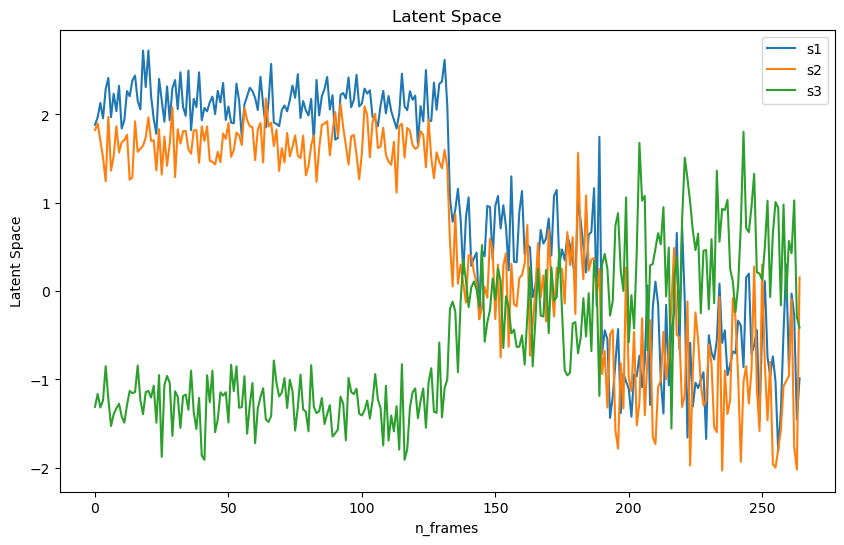

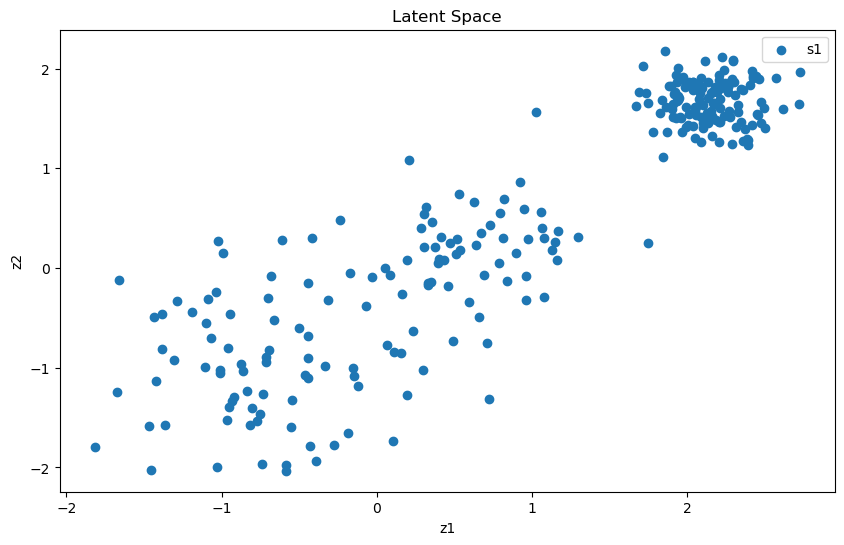

In [7]:
import matplotlib.pyplot as plt

# Plot the latent space

z = model(dataset['data'])
z = z.detach().numpy()

plt.figure(figsize=(10, 6))
plt.plot(range(z.shape[0]), z[:, 0], label=f"s{1}")
plt.plot(range(z.shape[0]), z[:, 1], label=f"s{2}")
plt.plot(range(z.shape[0]), z[:, 2], label=f"s{3}")
plt.xlabel('n_frames')
plt.ylabel('Latent Space')
plt.legend()
plt.title('Latent Space')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(z[:, 0], z[:, 1], label=f"s{1}")
plt.xlabel('z1')
plt.ylabel('z2')
plt.legend()
plt.title('Latent Space')
plt.show()